<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Customise/DataPipeline/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

#### Load the CIFAR-100 Dataset

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Load the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.cifar100.load_data(label_mode="fine")

dataset = tf.data.Dataset.from_tensor_slices(
    tensors=(train_images, train_labels))

# Inspect the dataset.
print(dataset.element_spec)

169001437/169001437 [==============================] - 2s 0us/step
(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))


#### Examine the Dataset

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

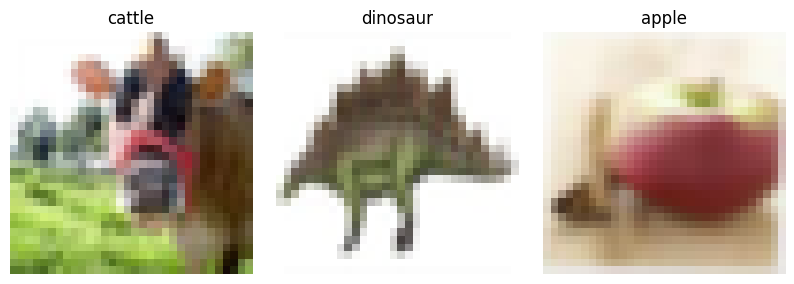

In [ ]:
import os
import json
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

os.makedirs("./data", exist_ok=True)

# Load the list of labels from a JSON file
with open("./data/cifar100_fine_labels.json", "r") as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

# Display a few examples
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for (elem, ax) in zip(dataset, axes.flat):
    image, label = elem[0], tf.squeeze(input=elem[1])
    ax.imshow(X=image)
    ax.set_title(label=cifar100_fine_labels[label])
    ax.axis("off")
plt.show()

#### Load the IMDB Dataset

In [ ]:
import numpy as np
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data()

# dataset = tf.data.Dataset.from_tensor_slices(
#     tensors=(train_data, train_labels))

# # Inspect the dataset
# print(dataset.element_spec)

# Print the shape of the training dataset, along with its corresponding label
print(f"train data shape: {train_data.shape}")
print(f"train labels shape: {train_labels.shape}")

train_data[0]
# # Get the lengths of the input sequences
# sequence_lengths = [len(seq) for seq in train_data]

# # Determine the maximum and minimum sequence length
# print(f"Max sequence length: {np.max(sequence_lengths)}")
# print(f"Min sequence length: {np.min(sequence_lengths)}")

#### Using Keyword Arguments

In [ ]:
import numpy as np
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Load the data ignoring the 50 most frequent words,
# use oov_char=2 (this is the default)
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(skip_top=50, oov_char=2)

print(f"train data shape: {train_data.shape}")
print(f"train labels shape: {train_labels.shape}")

# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in train_data]

# Determine the maximum and minimum sequence length
print(f"Max sequence length: {np.max(sequence_lengths)}")
print(f"Min sequence length: {np.min(sequence_lengths)}")

In [ ]:
import numpy as np

# Define functions for filtering the sequences
def remove_oov_char(element):
    """ Filter function for removing the oov_char. """
    return [word for word in element if word!=2]

def filter_list(lst):
    """ Run remove_oov_char on elements in a list. """
    return [remove_oov_char(element) for element in lst]

# Remove the oov_char from the sequences using the filter_list function
train_data = filter_list(train_data)

# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in train_data]

# Determine the maximum and minimum sequence length
print(f"Max sequence length: {np.max(sequence_lengths)}")
print(f"Min sequence length: {np.min(sequence_lengths)}")

***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [ ]:
def text_file_reader(filepath):
    with open(filepath, 'r') as f:
        for row in f:
            yield row

text_datagen = text_file_reader('data_file.txt')

next(text_datagen) # 'A line of text\n'
next(text_datagen) # 'Another line of text\n'

In [ ]:
import numpy as np

def get_data(batch_size):
    while True:
        y_train = np.random.choice([0, 1], (batch_size, 1))
        x_train = np.random.randn(batch_size, 1) + (2 * y_train - 1)
        yield x_train, y_train

datagen = get_data(32)

x, y = next(datagen)
print(f"x train shape: {x.shape}")
print(f"y train shape: {y.shape}")

In [ ]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD()
)
history = model.fit(datagen,
    steps_per_epoch=1000, epochs=10,
    verbose=0
)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.plot(history.epoch, history.history['loss'], label='Train')
ax.set_title('Loss vs. Epoch')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend()
plt.show()

datagen_eval = get_data(32)
model.evaluate(datagen_eval, steps=100, verbose=2)

datagen_test = get_data(32)
model.predict(datagen_test, steps=100, verbose=2)

In [ ]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD()
)

losses = []
for _ in range(10000):
    x_train, y_train = next(datagen)
    loss = model.train_on_batch(x=x_train, y=y_train)
    losses.append(loss)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.plot(losses, label='Train')
ax.set_title('Loss vs. Batch')
ax.set_ylabel('Loss')
ax.set_xlabel('Batch')
ax.legend()
plt.show()

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

In [ ]:
os.makedirs('./data', exist_ok=True)

In [ ]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever',
    'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('./data/fertility_diagnosis.txt', delimiter=',',
    header=None, names=headers)

In [ ]:
# Print the shape of the DataFrame

print(fertility.shape)

In [ ]:
# Show the head of the DataFrame

fertility.head()

#### Process the data

In [ ]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [ ]:
# Show the head of the DataFrame

fertility.head()

In [ ]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [ ]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [ ]:
# Show the head of the DataFrame

fertility.head()

In [ ]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [ ]:
# Show the head of the DataFrame

fertility.head()

In [ ]:
# Move the Output column such that it is the last column in the DataFrame

fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']

In [ ]:
# Show the head of the DataFrame

fertility.head()

In [ ]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()
fertility

#### Split the Data

In [ ]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [ ]:
# Verify the shape of the training data

print(training.shape)
print(validation.shape)

In [ ]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [ ]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (
            features[n*batch_size: (n+1)*batch_size],
            labels[n*batch_size: (n+1)*batch_size]
        )

In [ ]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [ ]:
# Test the generator using the next() function

x, y = next(train_generator)
print(f"x train shape: {x.shape}")
print(f"y train shape: {y.shape}")

#### Build the model

In [ ]:
# Create a model using Keras with 3 layers

input_shape = (12,)
output_shape = (1,)

def get_model(
    input_shape=input_shape,
    output_shape=output_shape
):
    model_input = tf.keras.Input(shape=input_shape)
    batch_1 = tf.keras.layers.BatchNormalization(momentum=0.8)(model_input)
    dense_1 = tf.keras.layers.Dense(units=100, activation='relu')(batch_1)
    batch_2 = tf.keras.layers.BatchNormalization(momentum=0.8)(dense_1)
    output = tf.keras.layers.Dense(units=1, activation='sigmoid')(batch_2)

    model = tf.keras.Model(inputs=model_input, outputs=output)

    return model

In [ ]:
# Display the model summary to show the resultant structure

model = get_model()
model.summary()

#### Compile the model

In [ ]:
# Compile the model with optimizer object, loss function and metric

def compile_model(model):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy()])

#### Train and evaluate the model using the generator

In [ ]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size
print(f"train steps: {train_steps:0d}")

In [ ]:
# Set the epochs to 3

epochs = 3

In [ ]:
# Train the model

model = get_model()
compile_model(model)

dfs_history = []
for epoch in range(epochs):
    train_generator = get_generator(training_features,
        training_labels, batch_size=batch_size)
    validation_generator = get_generator(validation_features,
        validation_labels, batch_size=30)
    history = model.fit(train_generator, steps_per_epoch=train_steps,
        validation_data=validation_generator, validation_steps=1,
        verbose=2)
    dfs_history.append(pd.DataFrame(history.history))

df_history = pd.concat(dfs_history)\
    .reset_index().drop(labels='index', axis=1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, ['loss', 'binary_accuracy']):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    try:
        sns.lineplot(ax=ax, data=df_history,
            x=df_history.index+1, y=f'val_{metric}', label='valid')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

In [ ]:
# Try to run the fit_generator function once more; observe what happens

model = get_model()
compile_model(model)

model.fit(train_generator, steps_per_epoch=train_steps,
    validation_data=validation_generator, validation_steps=1,
    verbose=2)

#### Make an infinitely looping generator

In [ ]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features)/batch_size)):
            yield (
                features[n*batch_size: (n+1)*batch_size],
                labels[n*batch_size: (n+1)*batch_size]
            )
        permuted = np.random.permutation(len(features))
        features = features[permuted]
        labels = labels[permuted]

In [ ]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(
    training_features, training_labels, batch_size=batch_size)

In [ ]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    x, y = next(train_generator_cyclic)
    print(f"{i}, x shape: {x.shape}, y shape: {y.shape}")

In [ ]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(
    validation_features, validation_labels, batch_size=batch_size)

In [ ]:
# Train the model

model = get_model()
compile_model(model)

history = model.fit(train_generator_cyclic, steps_per_epoch=train_steps,
    validation_data=validation_generator_cyclic, validation_steps=1,
    epochs=3, verbose=2)

df_history = pd.DataFrame(history.history,
    index=history.epoch)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, ['loss', 'binary_accuracy']):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    try:
        sns.lineplot(ax=ax, data=df_history,
            x=df_history.index+1, y=f'val_{metric}', label='valid')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

#### Evaluate the model and get predictions

In [ ]:
# Let's obtain a validation data generator.

validation_generator_cyclic = get_generator_cyclic(
    validation_features, validation_labels, batch_size=30)

In [ ]:
# Get predictions on the validation data

predictions = model.predict(validation_generator_cyclic,
    steps=1, verbose=0)
print(np.round(predictions.T[0]))

In [ ]:
# Print the corresponding validation labels

print(validation_labels)

In [ ]:
# Evaluate the model

evaluation = model.evaluate(
    validation_generator_cyclic, steps=1, verbose=0)
print(evaluation)

***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

image_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255., horizontal_flip=True, height_shift_range=0.2,
    fill_mode='nearest',featurewise_center=True) # aaaa|abcd|dddd

image_data_gen.fit(x_train)

train_datagen = image_data_gen.flow(
    x_train, y_train, batch_size=16)

model.fit(train_datagen, epochs=20)

#### Load the CIFAR-10 Dataset

In [ ]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = \
    tf.keras.datasets.cifar10.load_data()

In [ ]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(
    y=training_labels, num_classes=num_classes)
test_labels = tf.keras.utils.to_categorical(
    y=test_labels, num_classes=num_classes)

#### Create a generator function

In [ ]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (
            features[n*batch_size: (n+1)*batch_size],
            labels[n*batch_size: (n+1)*batch_size]
        )

In [ ]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(
    training_features, training_labels)

In [ ]:
# Assess the shape of the items generated by training_generator using the
# `next` function to yield an item.

image, label = next(training_generator)
print(f"image shape: {image.shape}")
print(f"label shape: {label.shape}")

In [ ]:
# Test the training generator by obtaining an image using the
# `next` generator function, and then using imshow to plot it.
# Print the corresponding label

image, label = next(training_generator)
image_unbatched = np.squeeze(image)
plt.imshow(image_unbatched)
plt.title(str(label))
plt.grid(visible=None)
plt.show()

In [ ]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(
    training_features, training_labels)

#### Create a data augmention generator

In [ ]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [ ]:
# Create an ImageDataGenerator object

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=monochrome,
    rotation_range=180, rescale=1/255.0)

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options.

In [ ]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(
    training_features, training_labels,
    batch_size=1, shuffle=False)

In [ ]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(np.squeeze(image))
ax[0].set_title('Transformed')
ax[0].grid(visible=None)
ax[1].imshow(np.squeeze(image_orig))
ax[1].set_title('Original')
ax[1].grid(visible=None)
plt.show()

#### Flow from directory

In [ ]:
os.makedirs('./data', exist_ok=True)

In [ ]:
# Inspect the directory structure

train_path = 'data/flowers-recognition-split/train'
val_path = 'data/flowers-recognition-split/val'

In [ ]:
# Create an ImageDataGenerator object

datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.)

In [ ]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(
    directory=train_path, batch_size=64, classes=classes,
    target_size=(16, 16))

In [ ]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(
    directory=val_path, batch_size=64, classes=classes,
    target_size=(16,16))

In [ ]:
# Get and display an image and label from the training generator

x = next(train_generator)
plt.imshow(x[0][8])
plt.title(str(x[1][8]))
plt.grid(visible=None)
plt.show()

In [ ]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(
    directory=train_path, batch_size=64, classes=classes,
    target_size=(16, 16))

#### Create a model to train

In [ ]:
# Build a CNN model

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16, 16, 3)))
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(8, 8),
    padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(8, 8),
    padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=4, kernel_size=(4, 4),
    padding='same', activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [ ]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [ ]:
# Compile the model

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
# Print the model summary

model.summary()

#### Train the model

In [ ]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(f"train steps per epoch: {train_steps_per_epoch}\
    \nvalid steps: {val_steps}")

In [ ]:
# Fit the model

history = model.fit(train_generator,
    steps_per_epoch=train_steps_per_epoch, epochs=5,
    verbose=2)

df_history = pd.DataFrame(history.history, index=history.epoch)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, ['loss', 'categorical_accuracy']):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

#### Evaluate the model

In [ ]:
# Evaluate the model

loss, accuracy = model.evaluate(
    val_generator, steps=val_steps, verbose=0)
print(f"loss: {loss:.2f}, accuracy: {accuracy:.2f}")

#### Predict using the generator

In [ ]:
# Predict labels with the model

predictions = model.predict(val_generator, steps=1, verbose=0)
print([classes[i] for i in np.argmax(predictions, axis=1)])

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

dataset = tf.data.Dataset.from_tensor_slices(tensors=(
    tf.random.uniform(shape=(256, 4), minval=1, maxval=10, dtype=tf.int32),
    tf.random.normal(shape=(256,))
))
print(dataset.element_spec)

for x, y in dataset.take(count=2):
    print(x.numpy(), y.numpy())

(TensorSpec(shape=(4,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))
[8 6 9 4] 0.08422458
[8 3 8 8] -0.86090374


In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.cifar10.load_data()

img_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2, horizontal_flip=True)
dataset = tf.data.Dataset.from_generator(
    generator=img_datagen.flow, args=[x_train, y_train],
    output_types=(tf.float32, tf.int32),
    output_shapes=([32, 32, 32, 3], [32, 1])
)
dataset.element_spec

(TensorSpec(shape=(32, 32, 32, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 1), dtype=tf.int32, name=None))

#### Create a zipped dataset

In [ ]:
import numpy as np
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Create a dataset from the tensor x
dataset1 = tf.data.Dataset.from_tensor_slices(
    tensors=np.zeros(shape=(100, 10, 2, 2)))

# Create another dataset from the tensor x2
# and inspect the Dataset object
dataset2 = tf.data.Dataset.from_tensor_slices(tensors=(
    np.zeros(shape=(10, 2, 2)), np.zeros(shape=(10, 1))
))

# Combine the two datasets into one larger dataset
dataset_zipped = tf.data.Dataset.zip(
    datasets=(dataset1, dataset2))
# Inspect the dataset object
print(dataset_zipped.element_spec)

# Define a function to find the number of batches in a dataset
def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

# Find the number of batches in the zipped Dataset
print(f"Number of batches: {get_batches(dataset_zipped)}")

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), (TensorSpec(shape=(2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.float64, name=None)))
Number of batches: 10


#### Create a dataset from numpy arrays

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Load the MNIST dataset
(train_features, train_labels), (test_features, test_labels) = \
    tf.keras.datasets.mnist.load_data()

# Create a Dataset from the MNIST data
mnist_dataset = tf.data.Dataset.from_tensor_slices(
    tensors=(train_features, train_labels))
# Inspect the Dataset object
print(mnist_dataset.element_spec)

# Inspect the length of an element using the take method
element = next(iter(mnist_dataset.take(count=1)))
print(f"Length of an element: {len(element)}")

# Examine the shapes of the data
print(f"x train shape: {element[0].shape}")
print(f"y train shape: {element[1].shape}")

11490434/11490434 [==============================] - 0s 0us/step
(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))
Length of an element: 2
x train shape: (28, 28)
y train shape: ()


#### Create a dataset from text data

In [ ]:
import os
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Print the list of text files
text_files = sorted([f.path for f in os.scandir(path="data/shakespeare")])

# Load the lines from the files into a dataset using TextLineDataset
shakespeare_dataset = tf.data.TextLineDataset(filenames=text_files)

# Use the take method to get and print the first 5 lines of the dataset
for line in shakespeare_dataset.take(count=5):
    print(line)

# Compute the number of lines in the shakespeare dataset we created
shakespeare_dataset_iterator = shakespeare_dataset.as_numpy_iterator()
lines = list(shakespeare_dataset_iterator)
print(f"Number of lines: {len(lines)}")

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)
Number of lines: 3134


#### Interleave lines from the text data files

In [ ]:
import os
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Print the list of text files
text_files = sorted([f.path for f in os.scandir(path="data/shakespeare")])

# Create a dataset of the text file strings
text_files_dataset = tf.data.Dataset.from_tensor_slices(
    tensors=text_files)

# Interleave the lines from the text files
interleaved_shakespeare_dataset = text_files_dataset.interleave(
    map_func=tf.data.TextLineDataset, cycle_length=9)
lines = list(interleaved_shakespeare_dataset.as_numpy_iterator())
print(f"Number of lines: {len(lines)}")

# Print the first 5 elements of the interleaved dataset
for line in interleaved_shakespeare_dataset.take(count=5):
    print(line)

Number of lines: 3134
tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.cifar10.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    tensors=(x_train, y_train))

def rescale(image, label):
    image = tf.cast(image, tf.float32)
    return image/255., label
dataset = dataset.map(map_func=rescale)

def label_filter(image, label):
    return tf.squeeze(label)!=9
dataset = dataset.filter(predicate=label_filter)

dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(batch_size=16, drop_remainder=True)
dataset = dataset.repeat(count=10)
dataset.element_spec

(TensorSpec(shape=(16, 32, 32, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(16, 1), dtype=tf.uint8, name=None))

#### Load the UCI Bank Marketing Dataset

In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
bank_dataframe = pd.read_csv("data/bank/bank-full.csv", delimiter=";")

# Select features from the DataFrame
features = [
    "age", "job", "marital", "education", "default", "balance",
    "housing", "loan", "contact", "campaign", "pdays", "poutcome"
]
labels = ["y"]
bank_dataframe = bank_dataframe.filter(items=features+labels)

# Print the shape of the DataFrame
print(f"data shape: {bank_dataframe.shape}")

# Show the head of the DataFrame
bank_dataframe.head()

data shape: (45211, 13)


,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [2]:
from sklearn import preprocessing

# Convert the categorical features in the DataFrame to one-hot encodings
encoder = preprocessing.LabelBinarizer()
categorical_features = [
    "default", "housing", "job", "loan",
    "education", "contact", "poutcome"
]
for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder
        .fit_transform(bank_dataframe[feature]))

# Shuffle the DataFrame
bank_dataframe = bank_dataframe.sample(frac=1)\
    .reset_index(drop=True)

# Show the head of the DataFrame
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,71,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",married,"[0, 1, 0, 0]",[0],1712,[0],[0],"[1, 0, 0]",1,-1,"[0, 0, 0, 1]",yes
1,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",married,"[0, 1, 0, 0]",[0],342,[1],[0],"[1, 0, 0]",3,-1,"[0, 0, 0, 1]",no
2,44,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",married,"[0, 0, 1, 0]",[0],7635,[0],[0],"[1, 0, 0]",5,-1,"[0, 0, 0, 1]",no
3,35,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",divorced,"[0, 1, 0, 0]",[0],-566,[1],[0],"[1, 0, 0]",2,353,"[1, 0, 0, 0]",no
4,33,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",single,"[0, 0, 1, 0]",[0],9670,[0],[0],"[1, 0, 0]",1,-1,"[0, 0, 0, 1]",no


#### Create the Dataset object

In [3]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Convert the DataFrame to a Dataset
dict_bank = dict(bank_dataframe)
bank_dataset = tf.data.Dataset.from_tensor_slices(
    tensors={k: dict_bank[k].tolist() for k in dict_bank})

# Inspect the Dataset object
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int64, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# First check that there are records in the dataset
# for non-married individuals
def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x["marital"] != "divorced":
            print("Found a person with marital status: {}"
                .format(x["marital"]))
            return
    print("No non-divorced people were found!")
check_divorced()

# Filter the Dataset to retain only entries
# with a 'divorced' marital status
bank_dataset = bank_dataset.filter(predicate=lambda x:
    tf.equal(x["marital"], tf.constant([b"divorced"]))[0])

# Check the records in the dataset again
check_divorced()

Found a person with marital status: b'married'
No non-divorced people were found!


#### Map a function over the dataset

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Convert the label ('y') to an integer
# instead of 'yes' or 'no'
def map_label(x):
    x["y"] = 0 if (x["y"]==tf.constant([b"no"], dtype=tf.string)) else 1
    return x
bank_dataset = bank_dataset.map(map_func=map_label)

# Remove the 'marital' column
bank_dataset = bank_dataset.map(map_func=lambda x:
    {key: val for key, val in x.items() if key!="marital"})

# Inspect the Dataset object
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int64, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")

# Create an input and output tuple for the dataset
def map_feature_label(x):
    features = [
        [x["age"]], [x["balance"]], [x["campaign"]], x["contact"],
        x["default"], x["education"], x["housing"], x["job"], x["loan"],
        [x["pdays"]], x["poutcome"]]
    return (tf.concat(features, axis=0), x["y"])

# Map this function over the dataset
bank_dataset = bank_dataset.map(map_func=map_feature_label)

# Inspect the Dataset object
bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [ ]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(f"dataset length: {dataset_length}")

In [ ]:
bank_dataset_iterator = iter(bank_dataset)
dataset_length = 0
try:
    while next(bank_dataset_iterator):
        dataset_length += 1
except Exception:
    pass
print(f"dataset length: {dataset_length}")

In [ ]:
# Make training and validation sets from the dataset

training_elements = int(dataset_length * 0.7)
train_dataset = bank_dataset.take(count=training_elements)
valid_dataset = bank_dataset.skip(count=training_elements)

print(f"train dataset element spec: {train_dataset.element_spec}")
print(f"valid dataset element spec: {valid_dataset.element_spec}")

#### Build a classification model

Now let's build a model to classify the features.

In [ ]:
# Build a classifier model

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(30,)))
model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model.add(tf.keras.layers.Dense(units=400, activation='relu'))
model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model.add(tf.keras.layers.Dense(units=400, activation='relu'))
model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
# Show the model summary

model.summary()

#### Train the model

In [ ]:
# Create batched training and validation datasets

train_dataset = train_dataset.batch(
    batch_size=20, drop_remainder=True)
print(f"train dataset element spec: {train_dataset.element_spec}")

valid_dataset = valid_dataset.batch(
    batch_size=100)
print(f"valid dataset element spec: {valid_dataset.element_spec}")

In [ ]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(buffer_size=1000)

In [ ]:
# Fit the model

history = model.fit(train_dataset, validation_data=valid_dataset,
    epochs=5, verbose=0)
df_history = pd.DataFrame(history.history, index=history.epoch)

In [ ]:
# Plot the training and validation accuracy

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, ['loss', 'binary_accuracy']):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    try:
        sns.lineplot(ax=ax, data=df_history,
            x=df_history.index+1, y=f'val_{metric}', label='valid')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} vs. epoch')
fig.tight_layout()
plt.show()